# Classifier 3: K-Nearest Neighbour Classifier

* Non-parametric, supervised learning algorithm
* Making predictions/ classifictions based on the grouping of individual data point
* Usually use euclidean distance (or Manhattan/ Minkowski
* Defining K becomes important, it defines how many neighbours will be checked to determine classification at a specify query point
* Recommend odd number of K
* Low values of K: high variance, low bias
* High values of K: low variance, high bias

In [1]:
# Classifier: K-Nearest Neighbour aka KNN (c)

# 6.c.1 Modelling - Implementing Model

# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classification using K-Nearest-Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Reading the processed data from local directory
processed_train=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_train.csv")
processed_test=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/scaled_test.csv")
target=pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/Data/Processed_Data/target.csv")


# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(processed_train, target, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
k_clf = KNeighborsClassifier()

# Fit the clasifier model
k_clf.fit(X_train, y_train)

# make predictions from model
y_pred=k_clf.predict(X_test)

(712, 11) (179, 11)
(712, 1) (179, 1)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [2]:
# 6.c.2 Modelling - model analysis

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 81%

Accuracy: 0.776536312849162


In [3]:
# 6.c.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features
new_train = processed_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
new_test = processed_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2)
k_clf = KNeighborsClassifier()

# Attempt grid search CV (cross validation)
param_grid = {
    'n_neighbors': [5, 15, 25, 35],
    'weights': ['uniform', 'distance', None],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size': [20,30,40,50],
    'p': [2,3,4,5],
}

# Do Hyperparameter Tuning
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

#Train the model using the training sets
# fit the training data to the classifier
# clf = RandomForestClassifier(n_estimators=1000, max_depth=3, max_features=None, max_leaf_nodes=9)
# clf=RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
#                        n_estimators=50)

# Fit the tuned model
k_tuned_clf=grid_search.best_estimator_
k_tuned_clf.fit(X_train, y_train)

# make predictions on test
y_pred = k_tuned_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_cla

KNeighborsClassifier(leaf_size=20, n_neighbors=35)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_cla

Tuned Accuracy: 0.7821229050279329
     PassengerId  Survived
0       1.001124         0
1       1.002247         0
2       1.003371         0
3       1.004494         0
4       1.005618         1
..           ...       ...
413     1.465169         0
414     1.466292         1
415     1.467416         0
416     1.468539         0
417     1.469663         0

[418 rows x 2 columns]
Your submission was successfully saved!


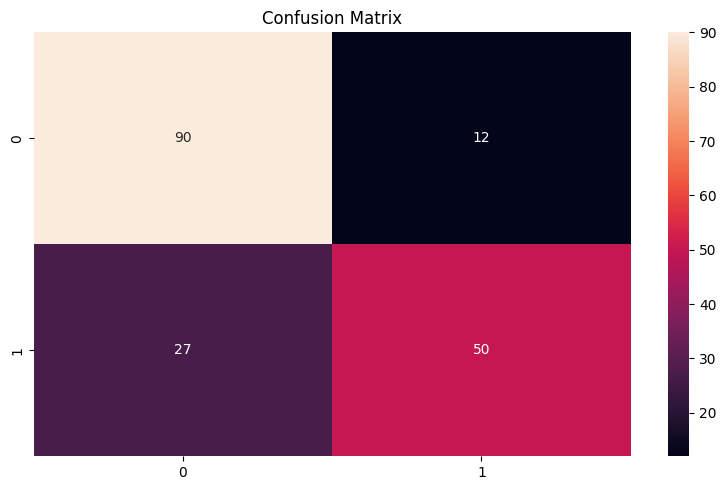

In [5]:
# 6.c.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%, overall 80~85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

# Classification report
# print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = k_tuned_clf.predict(new_test)
# Make a new column to store the predictions
new_test['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': new_test.PassengerId, 'Survived': prediction})

print(output)
# Assign output to a csv file
# output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# Summary of K-Nearest Neighbours classifier

Accuracy: 0.76555, 0.75598, 0.77272, 0.74162, 0.73444

* Overall accuracy lower than decision tree and random forest
* Models more accuracte when K is high

## Advantages:  
* Easy to implement
* Few hyperparameters
* Adapts easily

## Disadvantages:  
* Doesn't scale well (lots of resources of larger data)
* Falls into the curse of dimentionality (doesn't perform well in high dimension data)
* Prone to overfitting